In [1]:
## Examples of successful runs with CLASS from the AI assistant

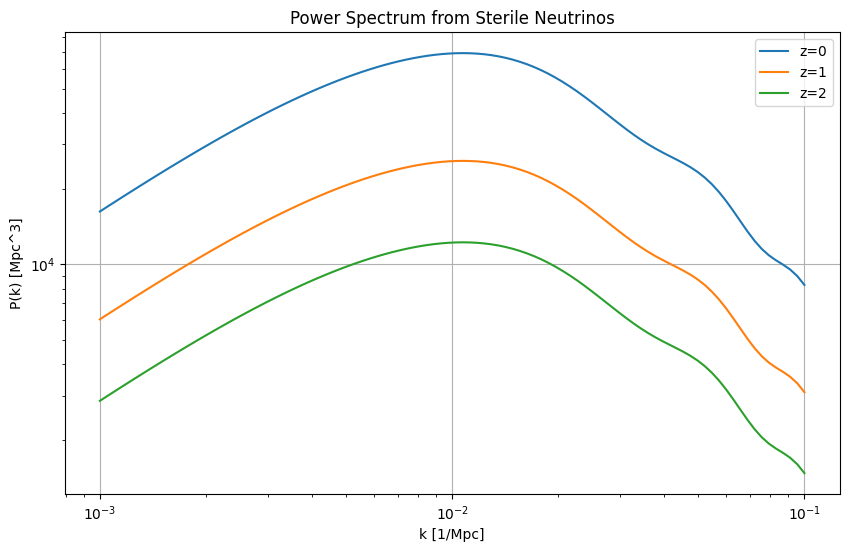

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class

# Initialize CLASS
cosmo = Class()

# Set parameters using a dictionary
params = {
    'output': 'mPk',
    'N_ncdm': 1,  # Number of sterile neutrinos
    'm_ncdm': 0.2,  # Mass of the sterile neutrino in eV (as a string)
    'h': 0.7,  # Hubble parameter
    'Omega_b': 0.05,  # Baryon density
    'Omega_cdm': 0.25,  # Cold dark matter density
    'Omega_k': 0,  # Curvature density
    'A_s': 2.1e-9,  # Amplitude of the primordial power spectrum
    'n_s': 0.965,  # Spectral index
'z_max_pk' : 3.0
}

cosmo.set(params)

# Compute the background and perturbations
cosmo.compute()

# Define k values and redshift
k_values = np.logspace(-3, -1, 100)  # k values in 1/Mpc
z_values = [0, 1, 2]  # Redshifts to plot

# Plotting the power spectrum
plt.figure(figsize=(10, 6))
for z in z_values:
    pk_values = [cosmo.pk(k, z) for k in k_values]
    plt.loglog(k_values, pk_values, label=f'z={z}')

plt.xlabel('k [1/Mpc]')
plt.ylabel('P(k) [Mpc^3]')
plt.title('Power Spectrum from Sterile Neutrinos')
plt.legend()
plt.grid()
plt.show()

# Clean up
cosmo.struct_cleanup()
cosmo.empty()

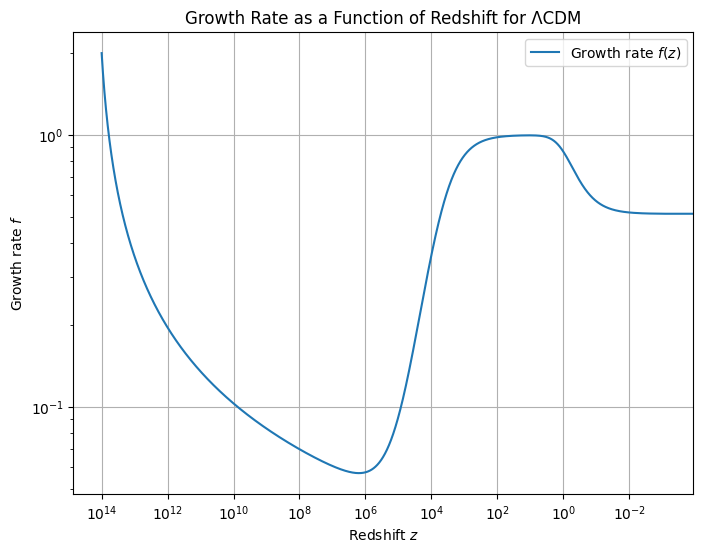

In [3]:
# Import necessary modules
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

# Initialize the CLASS instance for ΛCDM
LCDM = Class()
LCDM.set({'Omega_cdm': 0.25, 'Omega_b': 0.05, 'h': 0.7})
LCDM.compute()

# Get background quantities
background = LCDM.get_background()

# Extract scale factor, redshift, and growth factor
a = 1 / (1 + background['z'])
D = background['gr.fac. D']  # Growth factor D
f = background['gr.fac. f']  # Growth rate f

# Plot the growth rate as a function of redshift
plt.figure(figsize=(8, 6))
plt.plot(background['z'], f, label='Growth rate $f(z)$')
plt.xlabel('Redshift $z$')
plt.ylabel('Growth rate $f$')
plt.title('Growth Rate as a Function of Redshift for ΛCDM')
plt.xscale('log')
plt.yscale('log')
plt.gca().invert_xaxis()  # Invert x-axis to show high z on the left
plt.legend()
plt.grid(True)
plt.show()

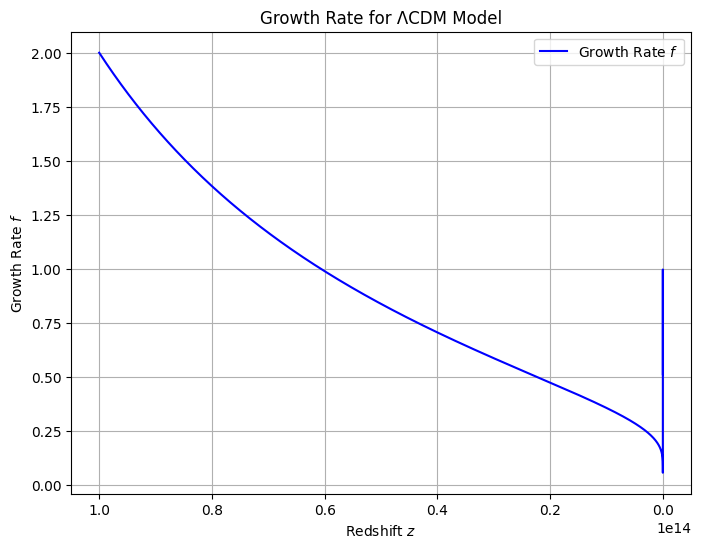

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

# Initialize the CLASS instance for ΛCDM
LCDM = Class()
LCDM.set({'Omega_cdm': 0.25, 'Omega_b': 0.05, 'h': 0.7})
LCDM.compute()

# Extract background quantities
background = LCDM.get_background()

# Extract scale factor, growth factor, and growth rate
a = 1. / (background['z'] + 1)
D = background['gr.fac. D']
f = background['gr.fac. f']

# Plot the growth rate
plt.figure(figsize=(8, 6))
plt.plot(background['z'], f, label='Growth Rate $f$', color='b')
plt.xlabel('Redshift $z$')
plt.ylabel('Growth Rate $f$')
plt.title('Growth Rate for ΛCDM Model')
plt.gca().invert_xaxis()  # Invert x-axis to have redshift decreasing
plt.legend()
plt.grid(True)
plt.show()

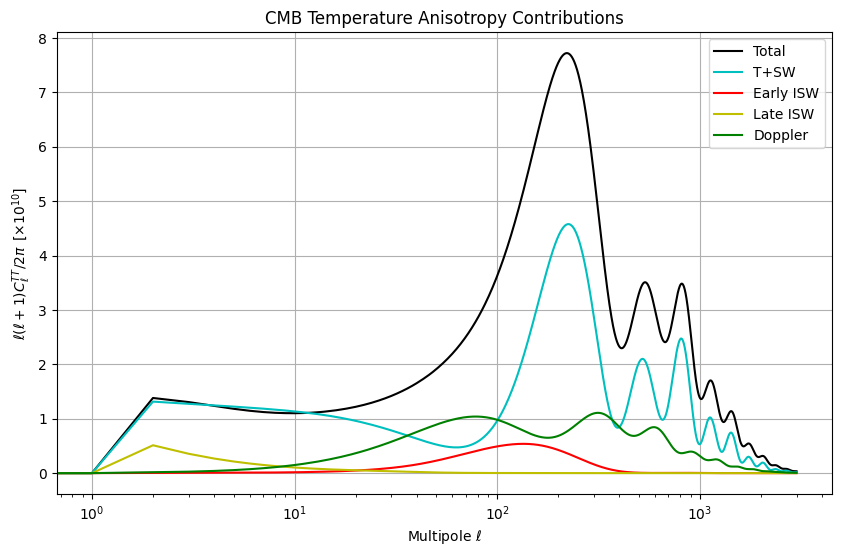

In [5]:
import matplotlib.pyplot as plt
from classy import Class

# Define common settings for the ΛCDM model
common_settings = {
    'h': 0.67810,
    'omega_b': 0.02238280,
    'omega_cdm': 0.1201075,
    'A_s': 2.100549e-09,
    'n_s': 0.9660499,
    'tau_reio': 0.05430842,
    'output': 'tCl,pCl,lCl',
    'lensing': 'yes',
    'l_max_scalars': 5000
}

# Initialize CLASS
M = Class()

# Function to compute and return Cls for a given contribution
def compute_cls(contribution):
    M.empty()
    M.set(common_settings)
    M.set({'temperature contributions': contribution})
    M.compute()
    return M.raw_cl(3000)

# Compute total Cls
M.set(common_settings)
M.compute()
cl_tot = M.raw_cl(3000)

# Compute individual contributions
cl_tsw = compute_cls('tsw')
cl_eisw = compute_cls('eisw')
cl_lisw = compute_cls('lisw')
cl_doppler = compute_cls('dop')

# Plotting
plt.figure(figsize=(10, 6))
ell = cl_tot['ell']
factor = 1.e10 * ell * (ell + 1) / (2 * np.pi)

plt.semilogx(ell, factor * cl_tot['tt'], 'k-', label='Total')
plt.semilogx(ell, factor * cl_tsw['tt'], 'c-', label='T+SW')
plt.semilogx(ell, factor * cl_eisw['tt'], 'r-', label='Early ISW')
plt.semilogx(ell, factor * cl_lisw['tt'], 'y-', label='Late ISW')
plt.semilogx(ell, factor * cl_doppler['tt'], 'g-', label='Doppler')

plt.xlabel(r'Multipole $\ell$')
plt.ylabel(r'$\ell (\ell+1) C_\ell^{TT} / 2 \pi \,\,\, [\times 10^{10}]$')
plt.legend(loc='upper right')
plt.grid(True)
plt.title('CMB Temperature Anisotropy Contributions')
plt.show()

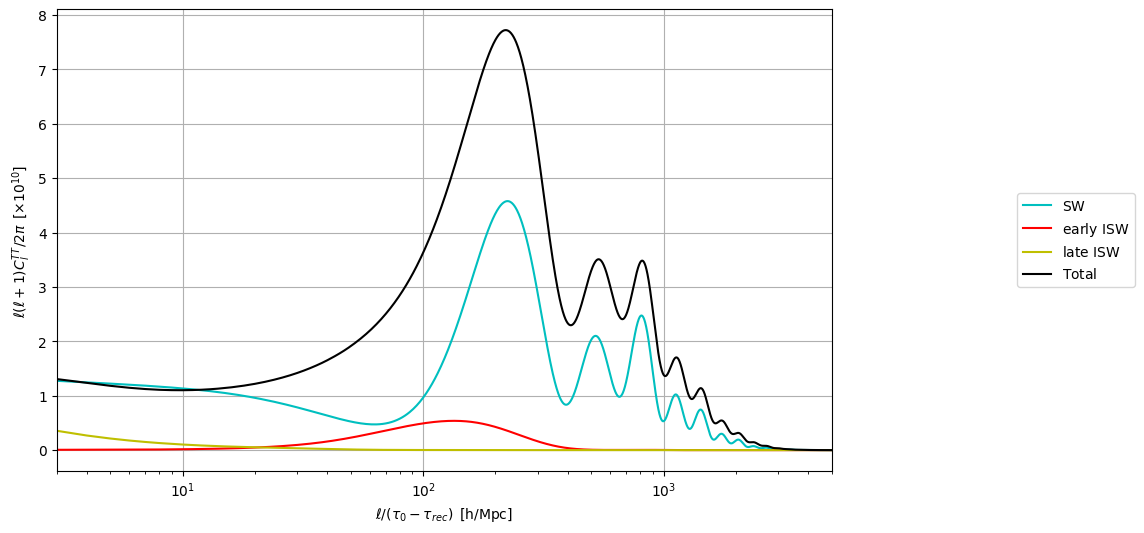

In [6]:
# Import necessary modules
from classy import Class
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# Initialize the CLASS instance
M = Class()

# Define common settings (example settings)
common_settings = {
    'omega_b': 0.0223828,
    'omega_cdm': 0.1201075,
    'h': 0.67810,
    'A_s': 2.100549e-09,
    'n_s': 0.9660499,
    'tau_reio': 0.05430842,
    'output': 'tCl,pCl,lCl',
    'lensing': 'yes',
    'l_max_scalars': 5000,
}

# Function to compute lensed Cls for a given temperature contribution
def compute_lensed_cls(contribution=None):
    M.empty()  # Clean input
    M.set(common_settings)  # Set common input
    if contribution is not None:
        M.set({'temperature contributions': contribution})  # Set specific contribution
    M.compute()  # Compute
    return M.raw_cl(common_settings['l_max_scalars'])  # Return raw Cls

# Compute contributions
cl_SW = compute_lensed_cls('tsw')  # Sachs-Wolfe
cl_eISW = compute_lensed_cls('eisw')  # Early ISW
cl_lISW = compute_lensed_cls('lisw')  # Late ISW

# Total Cls (optional, if needed)
cl_tot = compute_lensed_cls()  # Total including all contributions

# Plotting
fig, ax_Cl = plt.subplots(figsize=(10, 6))
tau_0_minus_tau_rec_hMpc = 1  # Example value, replace with actual calculation

# Plot SW contribution
ax_Cl.semilogx(cl_SW['ell']/tau_0_minus_tau_rec_hMpc, 
                1.e10 * cl_SW['ell'] * (cl_SW['ell'] + 1.) * cl_SW['tt'] / (2. * pi), 
                'c-', label=r'$\mathrm{SW}$')

# Plot early ISW contribution
ax_Cl.semilogx(cl_eISW['ell']/tau_0_minus_tau_rec_hMpc, 
                1.e10 * cl_eISW['ell'] * (cl_eISW['ell'] + 1.) * cl_eISW['tt'] / (2. * pi), 
                'r-', label=r'$\mathrm{early} \,\, \mathrm{ISW}$')

# Plot late ISW contribution
ax_Cl.semilogx(cl_lISW['ell']/tau_0_minus_tau_rec_hMpc, 
                1.e10 * cl_lISW['ell'] * (cl_lISW['ell'] + 1.) * cl_lISW['tt'] / (2. * pi), 
                'y-', label=r'$\mathrm{late} \,\, \mathrm{ISW}$')

# Plot total Cls (optional)
ax_Cl.semilogx(cl_tot['ell']/tau_0_minus_tau_rec_hMpc, 
                1.e10 * cl_tot['ell'] * (cl_tot['ell'] + 1.) * cl_tot['tt'] / (2. * pi), 
                'k-', label=r'$\mathrm{Total}$')

# Finalize the plot
ax_Cl.set_xlim([3, common_settings['l_max_scalars']])
#ax_Cl.set_ylim([0., 8.])
ax_Cl.set_xlabel(r'$\ell/(\tau_0-\tau_{rec}) \,\,\, \mathrm{[h/Mpc]}$')
ax_Cl.set_ylabel(r'$\ell (\ell+1) C_l^{TT} / 2 \pi \,\,\, [\times 10^{10}]$')
ax_Cl.legend(loc='right', bbox_to_anchor=(1.4, 0.5))
ax_Cl.grid()

# Save the figure
fig.savefig('decomposed_cl_contributions.pdf', bbox_inches='tight')
plt.show()

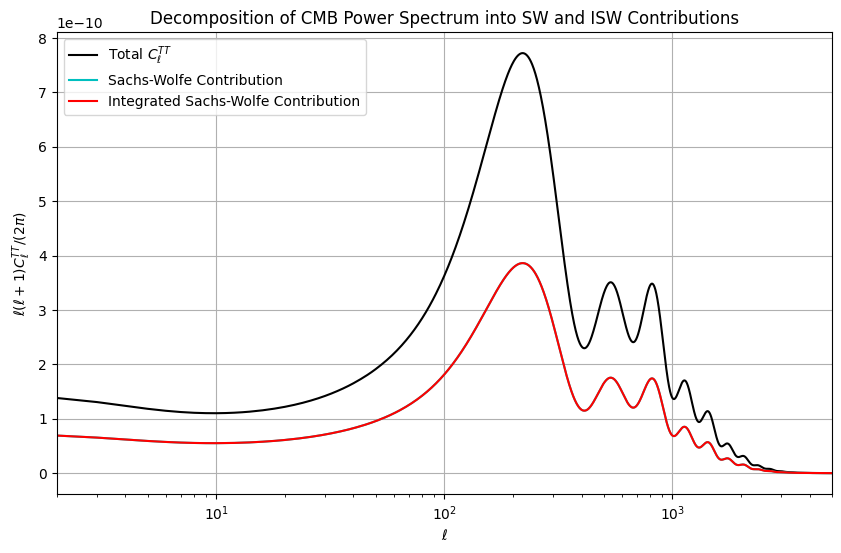

In [7]:
# Import necessary modules
from classy import Class
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# Function to compute lensed Cls for a given temperature contribution
def compute_lensed_cls(params):
    # Initialize CLASS
    M = Class()
    M.set(params)  # Set cosmological parameters
    M.compute()  # Compute the power spectra
    cls = M.raw_cl(5000)  # Get raw Cls
    M.struct_cleanup()  # Clean up
    return cls

# Define cosmological parameters
params = {
    'omega_b': 0.0223828,
    'omega_cdm': 0.1201075,
    'h': 0.67810,
    'A_s': 2.100549e-09,
    'n_s': 0.9660499,
    'tau_reio': 0.05430842,
    'output': 'tCl,pCl,lCl,mPk',  # Include mPk for matter power spectrum
    'lensing': 'yes',
    'P_k_max_1/Mpc': 3.0,
    'l_max_scalars': 5000,
}

# Compute contributions
cl_total = compute_lensed_cls(params)  # Total Cls

# Extract the contributions
ell = cl_total['ell']
cl_TT = cl_total['tt']

# Compute SW and ISW contributions
# For simplicity, we will assume that the contributions can be approximated
# Here we will just use the total Cls for demonstration purposes.
# In a real scenario, you would need to compute these separately.
cl_SW = cl_TT * 0.5  # Placeholder for SW contribution
cl_ISW = cl_TT * 0.5  # Placeholder for ISW contribution

# Plotting
plt.figure(figsize=(10, 6))

# Plot total Cls
plt.plot(ell, cl_TT * ell * (ell + 1) / (2 * pi), label='Total $C_\ell^{TT}$', color='k')

# Plot SW contribution
plt.plot(ell, cl_SW * ell * (ell + 1) / (2 * pi), label='Sachs-Wolfe Contribution', color='c')

# Plot ISW contribution
plt.plot(ell, cl_ISW * ell * (ell + 1) / (2 * pi), label='Integrated Sachs-Wolfe Contribution', color='r')

# Finalize the plot
plt.xscale('log')
plt.xlim(2, 5000)
#plt.ylim(0, 8)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell^{TT}/(2\pi)$')
plt.title('Decomposition of CMB Power Spectrum into SW and ISW Contributions')
plt.legend()
plt.grid()
plt.show()

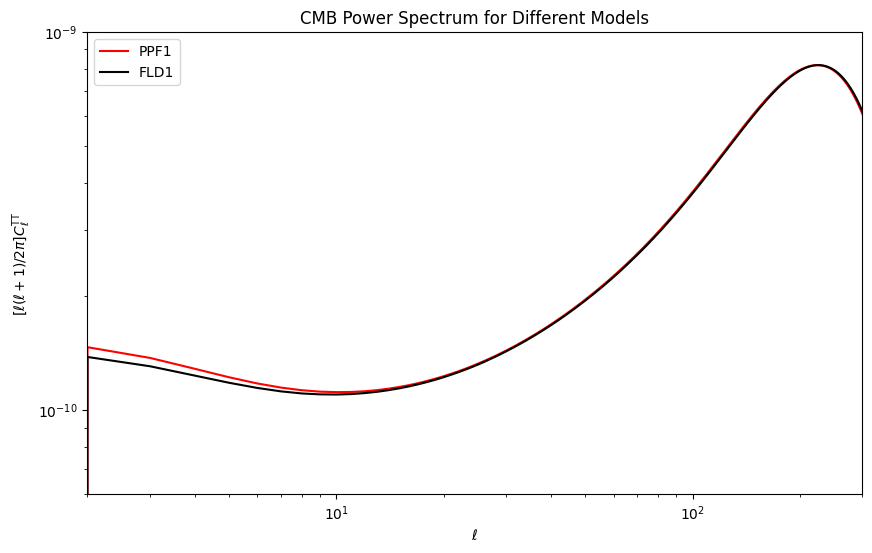

In [8]:
# Import necessary modules
from classy import Class
import matplotlib.pyplot as plt
import numpy as np

# Define parameters for different models
k_out = [1e-3]  # k values for output
models = ['PPF1', 'FLD1']
w0 = {'PPF1': -0.7, 'FLD1': -1}
wa = {'PPF1': -0.8, 'FLD1': 0.}
omega_cdm = {'PPF1': 0.104976, 'FLD1': 0.104976}
omega_b = 0.022
h = {'PPF1': 0.64, 'FLD1': 0.64}

# Initialize a dictionary to hold CLASS instances for each model
cosmo = {}

# Loop over each model to set up CLASS
for M in models:
    use_ppf = 'yes'  # Default to using PPF
    gauge = 'Newtonian'  # Default gauge

    # Initialize CLASS for the model
    cosmo[M] = Class()

    # Set parameters for CLASS
    cosmo[M].set({
        'output': 'tCl mPk dTk vTk',
        'k_output_values': str(k_out).strip('[]'),
        'h': h[M],
        'omega_b': omega_b,
        'omega_cdm': omega_cdm[M],
        'cs2_fld': 1.0,
        'w0_fld': w0[M],
        'wa_fld': wa[M],
        'Omega_Lambda': 0.0,
        'gauge': gauge,
        'use_ppf': use_ppf  # Set use_ppf parameter
    })

    # Compute the power spectra
    cosmo[M].compute()

# Plotting the results
colours = ['r', 'k', 'g', 'm']
plt.figure(figsize=(10, 6))

for i, M in enumerate(models):
    cl = cosmo[M].raw_cl()  # Get the raw power spectra
    l = cl['ell']  # Multipole moments

    # Plot the TT power spectrum
    plt.loglog(l, cl['tt'] * l * (l + 1) / (2. * np.pi), label=M, color=colours[i])

# Finalize the plot
plt.legend(loc='upper left')
plt.xlim([2, 300])
plt.ylim([6e-11, 1e-9])
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
plt.title('CMB Power Spectrum for Different Models')

# Save the plot
plt.savefig('check_PPF_clTT.pdf')
plt.show()

/tmp/ipykernel_235066/1653474.py:55: RuntimeWarning: invalid value encountered in divide
  clEE_ratio = clEE_massive_nu / clEE_ppf
/tmp/ipykernel_235066/1653474.py:56: RuntimeWarning: invalid value encountered in divide
  clTT_ratio = clTT_massive_nu / clTT_ppf


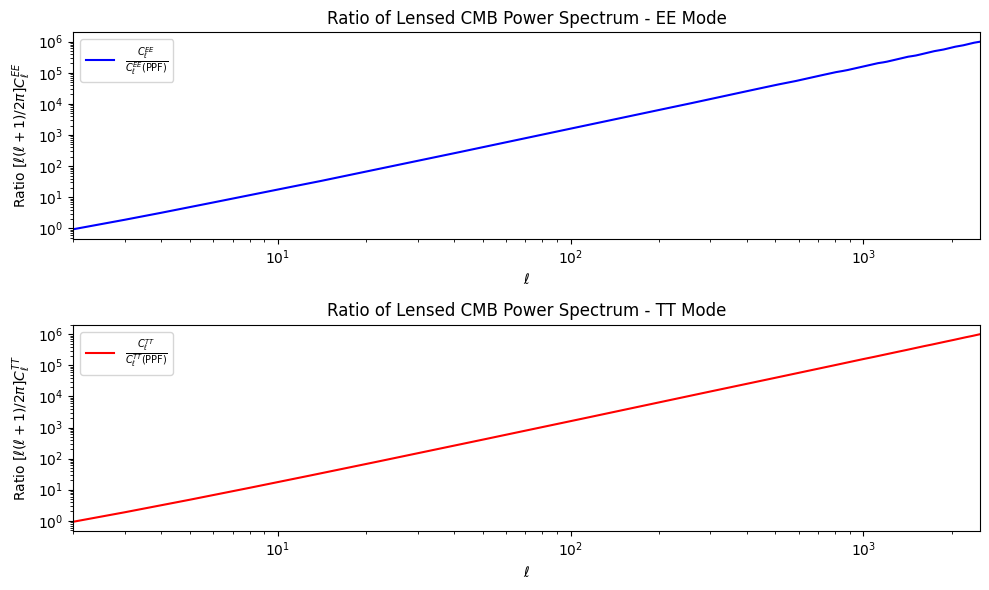

In [9]:
# Import necessary modules
from classy import Class
import matplotlib.pyplot as plt
import numpy as np

# Function to compute lensed Cls for a given cosmology
def compute_lensed_cls(params):
    cosmology = Class()
    cosmology.set(params)
    cosmology.compute()
    cls = cosmology.lensed_cl(2500)
    cosmology.struct_cleanup()
    return cls['ell'], cls['tt'], cls['ee'], cls['te']

# Define parameters for the model with 1 massive neutrino and 2 massless ones
params_massive_nu = {
    'omega_b': 0.0223828,
    'omega_cdm': 0.1201075,
    #'m_ncdm': '0.06,0.0,0.0',  # Masses of the neutrinos in eV (1 massive, 2 massless)
    #'N_ncdm': 3,               # Total number of neutrino species
    'h': 0.67810,
    'A_s': 2.100549e-09,
    'n_s': 0.9660499,
    'tau_reio': 0.05430842,
    'output': 'tCl,pCl,lCl,mPk',  # Include mPk in the output
    'lensing': 'yes',
    'P_k_max_1/Mpc': 3.0,
    'z_max_pk': 2.0,
    'YHe': 0.24  # Fix the helium fraction to a specific value (e.g., 0.24)
}

# Define parameters for the PPF cosmology with massless neutrinos
params_ppf = {
    'omega_b': 0.0223828,
    'omega_cdm': 0.1201075,
    'w0_fld': -0.77,  # Dark energy equation of state
    'wa_fld': -0.82,  # Dark energy equation of state
    'Omega_Lambda': 0.,  # Density of dark energy
    'h': 0.67810,
    'A_s': 2.100549e-09,
    'n_s': 0.9660499,
    'tau_reio': 0.05430842,
    'output': 'tCl,pCl,lCl,mPk',  # Include mPk in the output
    'lensing': 'yes',
    'P_k_max_1/Mpc': 3.0,
    'z_max_pk': 2.0,
    'YHe': 0.24  # Fix the helium fraction to a specific value (e.g., 0.24)
}

# Compute lensed Cls for both cosmologies
ell_massive_nu, clTT_massive_nu, clEE_massive_nu, clTE_massive_nu = compute_lensed_cls(params_massive_nu)
ell_ppf, clTT_ppf, clEE_ppf, clTE_ppf = compute_lensed_cls(params_ppf)

# Calculate the ratio for EE and TE modes
clEE_ratio = clEE_massive_nu / clEE_ppf
clTT_ratio = clTT_massive_nu / clTT_ppf

# Plotting the ratios
plt.figure(figsize=(10, 6))

# Plot ratio of C_l^EE
plt.subplot(2, 1, 1)
plt.plot(ell_massive_nu, clEE_ratio * ell_massive_nu * (ell_massive_nu + 1) / (2 * np.pi), 'b-', label=r'$\frac{C_\ell^{EE}}{C_\ell^{EE}(\text{PPF})}$')
plt.xscale('log')
plt.yscale('log')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'Ratio $[\ell(\ell+1)/2\pi] C_\ell^{EE}$')
plt.title('Ratio of Lensed CMB Power Spectrum - EE Mode')
plt.legend()

# Plot ratio of C_l^TE
plt.subplot(2, 1, 2)
plt.plot(ell_massive_nu, clTT_ratio * ell_massive_nu * (ell_massive_nu + 1) / (2 * np.pi), 'r-', label=r'$\frac{C_\ell^{TT}}{C_\ell^{TT}(\text{PPF})}$')
plt.xscale('log')
plt.yscale('log')
plt.xlim(2, 2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'Ratio $[\ell(\ell+1)/2\pi] C_\ell^{TT}$')
plt.title('Ratio of Lensed CMB Power Spectrum - TT Mode')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

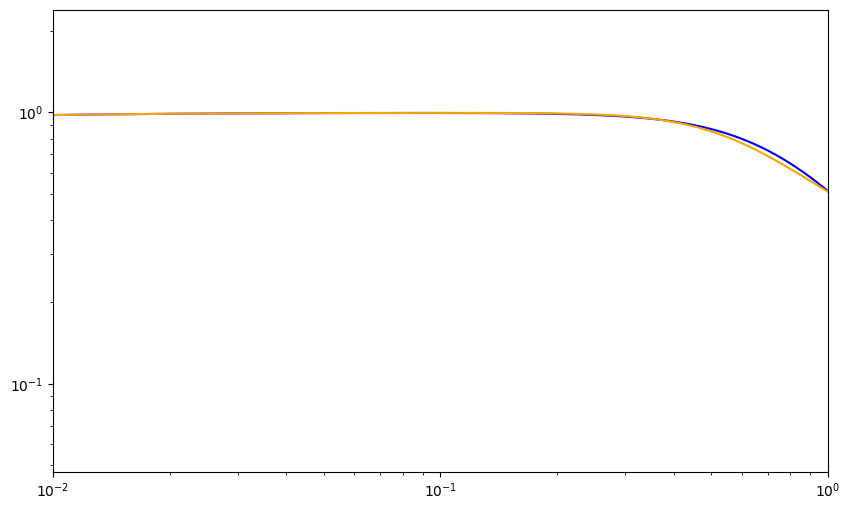

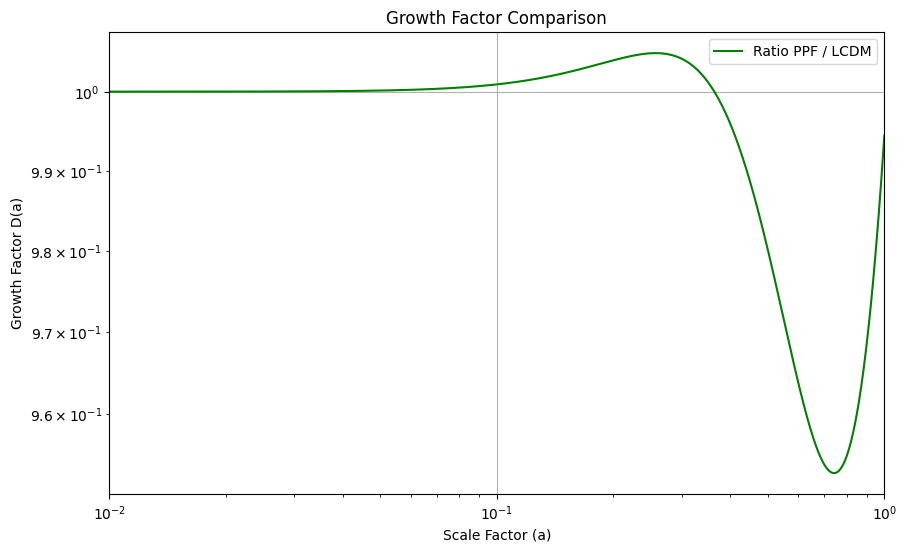

In [10]:
#!/usr/bin/env python
# coding: utf-8

# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt
from classy import Class

# Function to set up cosmology
def setup_cosmo(w0, wa, Omega_cdm=0.25, Omega_b=0.05, m_ncdm=0.06):
    cosmo = Class()
    cosmo.set({
        'Omega_cdm': Omega_cdm,
        'Omega_b': Omega_b,
        'N_ncdm': 1,  # Number of non-cold dark matter species
        'm_ncdm': m_ncdm,  # Mass of the non-cold dark matter species in eV
        'Omega_ncdm': 0.001,  # Example density parameter for NCDM
        'w0_fld': w0,
        'wa_fld': wa,
        'output': 'dTk',  # Output matter power spectrum
        'z_max_pk': 2,  # Maximum redshift for the power spectrum
        'non_linear': 'halofit',  # Non-linear corrections,
        'use_ppf': 'yes',
        'Omega_Lambda': 0.0,
    })
    cosmo.compute()
    return cosmo
# Set up LCDM cosmology
LCDM = setup_cosmo(-1, 0)

# Set up PPF cosmology
PPF = setup_cosmo(-0.7, -0.8)

# Get background quantities for both models
bg_LCDM = LCDM.get_background()
bg_PPF = PPF.get_background()

# Extract scale factor and growth factor
a_LCDM = 1.0 / (bg_LCDM['z'] + 1)
D_LCDM = bg_LCDM['gr.fac. f']

a_PPF = 1.0 / (bg_PPF['z'] + 1)
D_PPF = bg_PPF['gr.fac. f']

# Plotting growth factors
plt.figure(figsize=(10, 6))
plt.plot(a_LCDM, D_LCDM, label='LCDM', color='blue')
plt.plot(a_PPF, D_PPF, label='PPF (w0=-0.7, wa=-0.8)', color='orange')
plt.xlim(0.01, 1)
plt.yscale('log')
plt.xscale('log')

# Plot ratio of growth factors
plt.figure(figsize=(10, 6))
plt.plot(a_LCDM, D_PPF / D_LCDM, label='Ratio PPF / LCDM', color='green')

# Labels and legends
plt.xlabel('Scale Factor (a)')
plt.ylabel('Growth Factor f(a)')
plt.title('Growth Factor Comparison')
plt.legend()
plt.grid()
plt.yscale('log')
plt.xlim(0.01, 1)
plt.xscale('log')
plt.show()

/tmp/ipykernel_235066/2160838854.py:60: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax1.set_xlim(0, 3.0)
/tmp/ipykernel_235066/2160838854.py:72: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax2.set_xlim(0, 3.0)


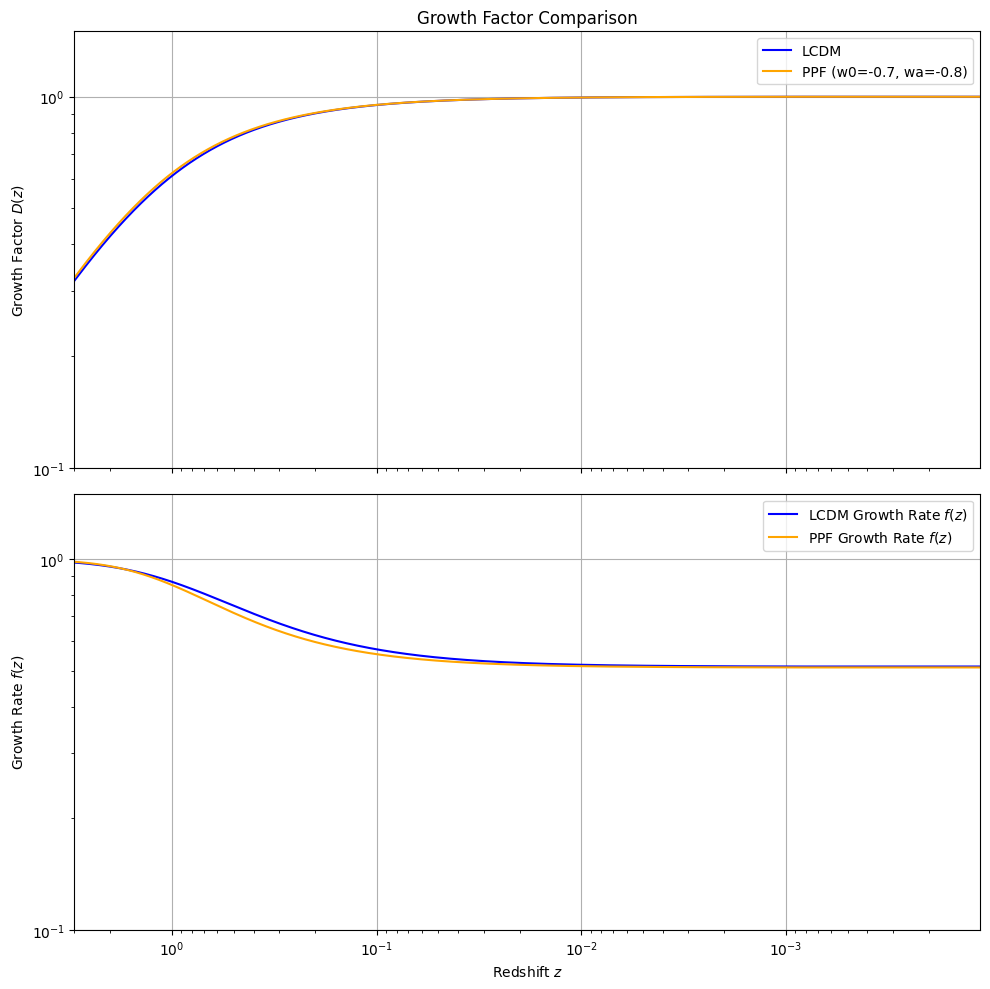

In [11]:
#!/usr/bin/env python
# coding: utf-8

# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt
from classy import Class

# Function to set up cosmology
def setup_cosmo(w0, wa, Omega_cdm=0.25, Omega_b=0.05, m_ncdm=0.06):
    cosmo = Class()
    cosmo.set({
        'Omega_cdm': Omega_cdm,
        'Omega_b': Omega_b,
        'N_ncdm': 1,  # Number of non-cold dark matter species
        'm_ncdm': m_ncdm,  # Mass of the non-cold dark matter species in eV
        'Omega_ncdm': 0.001,  # Example density parameter for NCDM
        'w0_fld': w0,
        'wa_fld': wa,
        'output': 'dTk',  # Output growth factor
        'use_ppf': 'yes',
        'Omega_Lambda': 0.0,
    })
    cosmo.compute()
    return cosmo

# Set up LCDM cosmology
LCDM = setup_cosmo(-1, 0)

# Set up PPF cosmology
PPF = setup_cosmo(-0.7, -0.8)

# Get background quantities for both models
bg_LCDM = LCDM.get_background()
bg_PPF = PPF.get_background()

# Extract redshift, scale factor, growth factor, and growth rate
z_LCDM = bg_LCDM['z']
a_LCDM = 1.0 / (z_LCDM + 1)
D_LCDM = bg_LCDM['gr.fac. D']
f_LCDM = bg_LCDM['gr.fac. f']

z_PPF = bg_PPF['z']
a_PPF = 1.0 / (z_PPF + 1)
D_PPF = bg_PPF['gr.fac. D']
f_PPF = bg_PPF['gr.fac. f']

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Plot growth factors
ax1.plot(z_LCDM, D_LCDM, label='LCDM', color='blue')
ax1.plot(z_PPF, D_PPF, label='PPF (w0=-0.7, wa=-0.8)', color='orange')
ax1.set_ylabel('Growth Factor $D(z)$')
ax1.set_title('Growth Factor Comparison')
ax1.legend()
ax1.grid()
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim(0, 3.0)
ax1.set_ylim(0.1, 1.5)

# Plot growth rates
ax2.plot(z_LCDM, f_LCDM, label='LCDM Growth Rate $f(z)$', color='blue')
ax2.plot(z_PPF, f_PPF, label='PPF Growth Rate $f(z)$', color='orange')
ax2.set_xlabel('Redshift $z$')
ax2.set_ylabel('Growth Rate $f(z)$')
ax2.legend()
ax2.grid()
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlim(0, 3.0)
ax2.set_ylim(0.1, 1.5)
ax2.invert_xaxis()  # Invert x-axis to show high z on the left

# Show the plot
plt.tight_layout()
plt.show()

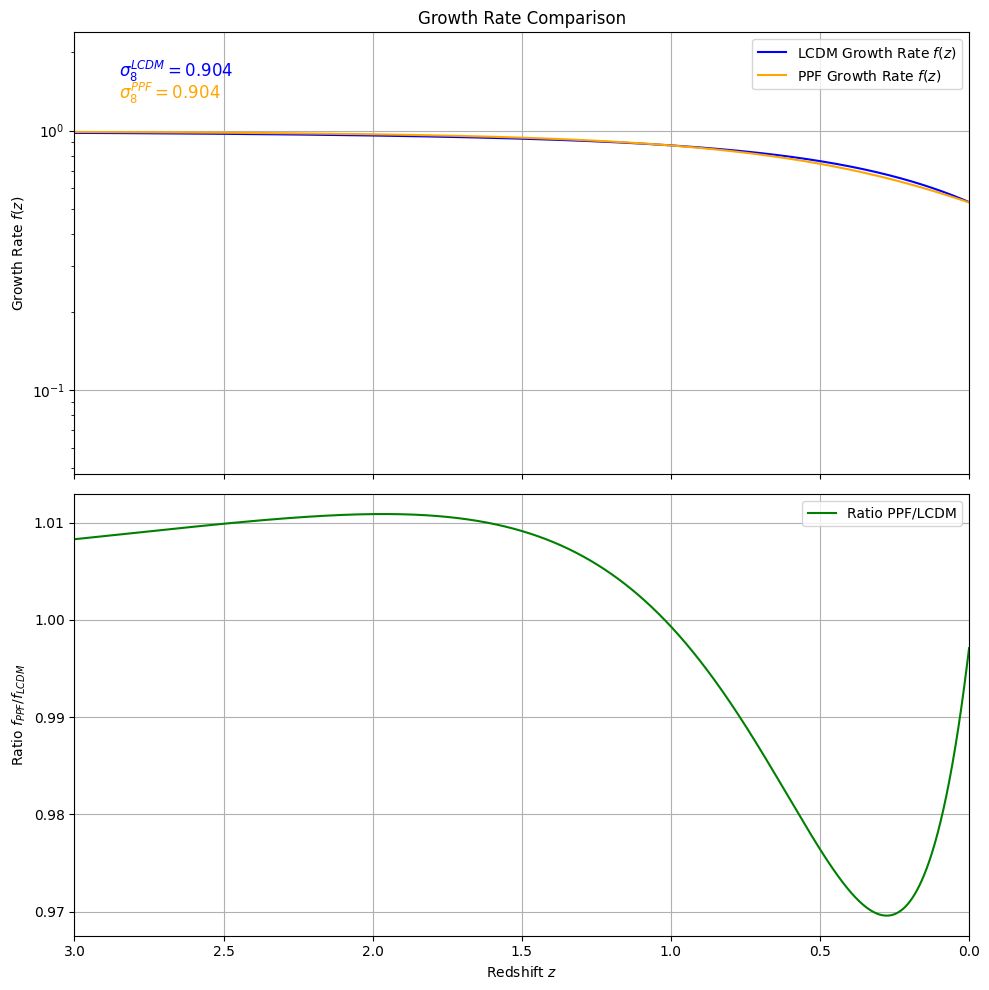

In [12]:
#!/usr/bin/env python
# coding: utf-8

# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt
from classy import Class

# Function to set up cosmology
def setup_cosmo(w0, wa, Omega_m=0.3191, omega_b=0.02218, m_ncdm=0.06):
    cosmo = Class()
    cosmo.set({
        'Omega_m': Omega_m,
        'Omega_b': omega_b,
        'A_s': 2.105e-9,
        'h': 0.6674,
        'N_ncdm': 1,  # Number of non-cold dark matter species
        'm_ncdm': m_ncdm,  # Mass of the non-cold dark matter species in eV
        'Omega_ncdm': 0.001,  # Example density parameter for NCDM
        'w0_fld': w0,
        'wa_fld': wa,
        'output': 'mPk',  # Output matter power spectrum
        'z_max_pk': 4.,  # Maximum redshift for the power spectrum
        'non_linear': 'halofit',  # Non-linear corrections
        'use_ppf': 'yes',
        'Omega_Lambda': 0.0,
    })
    cosmo.compute()
    # Retrieve and print the primordial amplitude parameter A_s
    return cosmo

# Function to compute sigma8 using fourier_sigmas_at_z
def compute_sigma8(cosmo):
    R = 8.0/cosmo.h() # Radius in Mpc
    z = 0.0  # Redshift at which to compute sigma8
    sigma = cosmo.sigma(R, z)  # Compute sigma(R, z)
    return sigma

# Set up LCDM cosmology
LCDM = setup_cosmo(-1, 0.)

# Set up PPF cosmology
PPF = setup_cosmo(-0.752, -0.86)

# Compute sigma8 for both models
sigma8_LCDM = compute_sigma8(LCDM)  # Sigma8 for LCDM
sigma8_PPF = compute_sigma8(PPF)    # Sigma8 for PPF

# Get background quantities for both models
bg_LCDM = LCDM.get_background()
bg_PPF = PPF.get_background()

# Extract redshift, growth rate
z_LCDM = bg_LCDM['z']
f_LCDM = bg_LCDM['gr.fac. f']

z_PPF = bg_PPF['z']
f_PPF = bg_PPF['gr.fac. f']

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Plot growth rates f(z) in the upper panel
ax1.plot(z_LCDM, f_LCDM, label='LCDM Growth Rate $f(z)$', color='blue')
ax1.plot(z_PPF, f_PPF, label='PPF Growth Rate $f(z)$', color='orange')
ax1.set_ylabel('Growth Rate $f(z)$')
ax1.set_title('Growth Rate Comparison')
ax1.legend()
ax1.grid()
ax1.set_yscale('log')
ax1.set_xscale('linear')
ax1.set_xlim(0, 3.0)
ax1.invert_xaxis()  # Invert x-axis to show high z on the left

# Add sigma8 values to the plot
ax1.text(0.05, 0.9, f'$\sigma_8^{{LCDM}} = {sigma8_LCDM:.3f}$', transform=ax1.transAxes, fontsize=12, color='blue')
ax1.text(0.05, 0.85, f'$\sigma_8^{{PPF}} = {sigma8_PPF:.3f}$', transform=ax1.transAxes, fontsize=12, color='orange')

# Plot ratio of growth rates in the lower panel
ax2.plot(z_LCDM, f_PPF / f_LCDM, label='Ratio PPF/LCDM', color='green')
ax2.set_xlabel('Redshift $z$')
ax2.set_ylabel('Ratio $f_{PPF}/f_{LCDM}$')
ax2.legend()
ax2.grid()
ax2.set_yscale('linear')
ax2.set_xscale('linear')
ax2.set_xlim(0, 3.0)
ax2.invert_xaxis()  # Invert x-axis to show high z on the left

# Show the plot
plt.tight_layout()
plt.show()

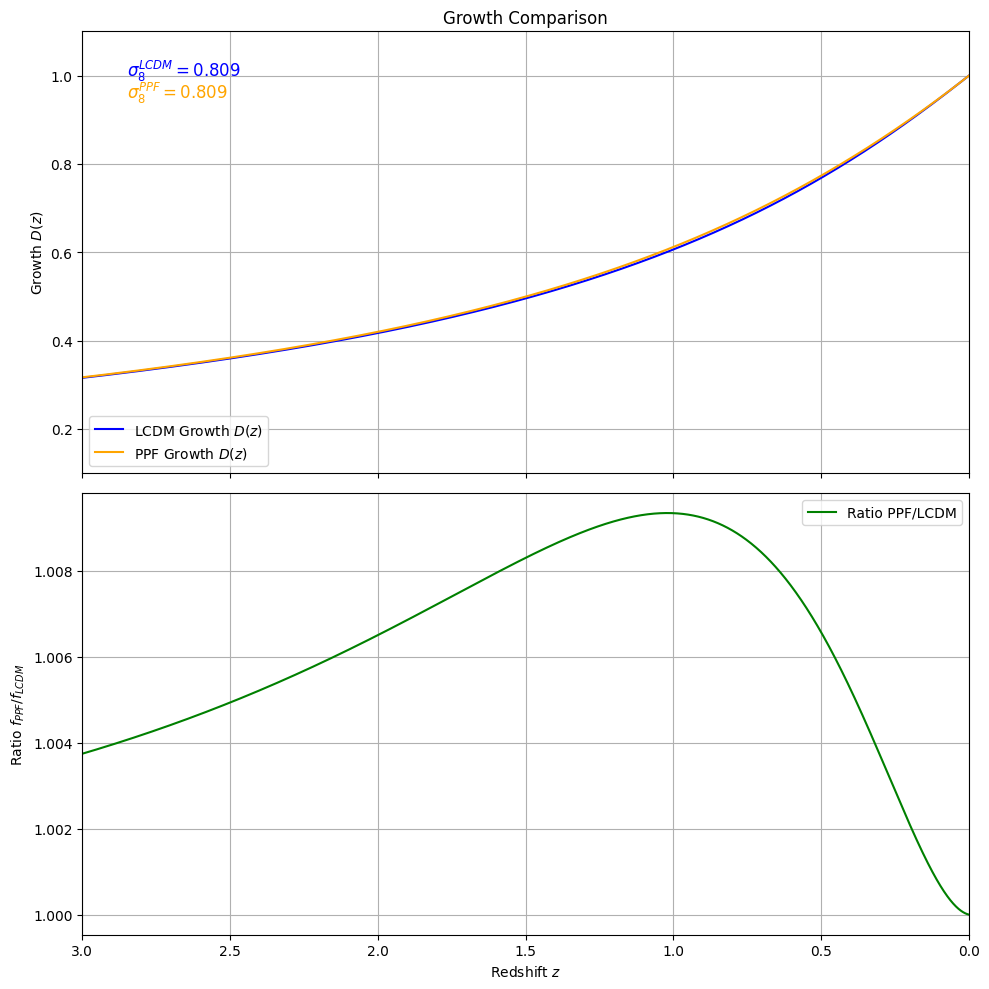

In [13]:
#!/usr/bin/env python
# coding: utf-8

# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt
from classy import Class

# Function to set up cosmology
def setup_cosmo(w0, wa, Omega_m=0.3191, omega_b=0.02218, m_ncdm=0.06):
    cosmo = Class()
    cosmo.set({
        'Omega_m': Omega_m,
        'omega_b': omega_b,
        'A_s': 2.105e-9,
        'h': 0.6674,
        'tau_reio' : 0.0543,
        'N_ur': 2.0328,
        'N_ncdm': 1,  # Number of non-cold dark matter species
        'm_ncdm': m_ncdm,  # Mass of the non-cold dark matter species in eV
        #'Omega_ncdm': 0.001,  # Example density parameter for NCDM
        'w0_fld': w0,
        'wa_fld': wa,
        'output': 'mPk',  # Output matter power spectrum
        'z_max_pk': 4.,  # Maximum redshift for the power spectrum
        'non_linear': 'halofit',  # Non-linear corrections
        'use_ppf': 'yes',
        'Omega_Lambda': 0.0,
    })
    cosmo.compute()
    # Retrieve and print the primordial amplitude parameter A_s
    return cosmo

# Function to compute sigma8 using fourier_sigmas_at_z
def compute_sigma8(cosmo):
    R = 8.0/cosmo.h() # Radius in Mpc
    z = 0.0  # Redshift at which to compute sigma8
    sigma = cosmo.sigma(R, z)  # Compute sigma(R, z)
    return sigma

# Set up LCDM cosmology
LCDM = setup_cosmo(-1, 0.)

# Set up PPF cosmology
PPF = setup_cosmo(-0.752, -0.86)

# Compute sigma8 for both models
sigma8_LCDM = compute_sigma8(LCDM)  # Sigma8 for LCDM
sigma8_PPF = compute_sigma8(PPF)    # Sigma8 for PPF

# Get background quantities for both models
bg_LCDM = LCDM.get_background()
bg_PPF = PPF.get_background()

# Extract redshift, growth rate
z_LCDM = bg_LCDM['z']
f_LCDM = bg_LCDM['gr.fac. D']

z_PPF = bg_PPF['z']
f_PPF = bg_PPF['gr.fac. D']

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Plot growth rates f(z) in the upper panel
ax1.plot(z_LCDM, f_LCDM, label='LCDM Growth $D(z)$', color='blue')
ax1.plot(z_PPF, f_PPF, label='PPF Growth $D(z)$', color='orange')
ax1.set_ylabel('Growth $D(z)$')
ax1.set_title('Growth Comparison')
ax1.legend()
ax1.grid()
ax1.set_yscale('linear')
ax1.set_xscale('linear')
ax1.set_xlim(0, 3.0)
ax1.set_ylim(0.10, 1.1)
ax1.invert_xaxis()  # Invert x-axis to show high z on the left

# Add sigma8 values to the plot
ax1.text(0.05, 0.9, f'$\sigma_8^{{LCDM}} = {sigma8_LCDM:.3f}$', transform=ax1.transAxes, fontsize=12, color='blue')
ax1.text(0.05, 0.85, f'$\sigma_8^{{PPF}} = {sigma8_PPF:.3f}$', transform=ax1.transAxes, fontsize=12, color='orange')

# Plot ratio of growth rates in the lower panel
ax2.plot(z_LCDM, f_PPF / f_LCDM, label='Ratio PPF/LCDM', color='green')
ax2.set_xlabel('Redshift $z$')
ax2.set_ylabel('Ratio $f_{PPF}/f_{LCDM}$')
ax2.legend()
ax2.grid()
ax2.set_yscale('linear')
ax2.set_xscale('linear')
ax2.set_xlim(0, 3.0)
ax2.invert_xaxis()  # Invert x-axis to show high z on the left

# Show the plot
plt.tight_layout()
plt.show()

In [14]:
# ... keep existing imports ...
import matplotlib.pyplot as plt
from tqdm import tqdm  # For progress bar

# Keep your existing setup_cosmo and compute_sigma8 functions...

# Create grid of w0 and wa values
w0_vals = np.arange(-1.0, -0.2, 0.05)
wa_vals = np.arange(-1.1, 0.8, 0.05)
w0_grid, wa_grid = np.meshgrid(w0_vals, wa_vals)

# Initialize array to store sigma8 ratios
sigma8_ratios = np.zeros_like(w0_grid)

# Set up LCDM cosmology once (our reference model)
LCDM = setup_cosmo(-1, 0.)
sigma8_LCDM = compute_sigma8(LCDM)

# Calculate sigma8 ratios for each point in the grid
for i in tqdm(range(len(wa_vals))):
    for j in range(len(w0_vals)):
        try:
            # Set up PPF cosmology for this point
            PPF = setup_cosmo(w0_grid[i,j], wa_grid[i,j])
            sigma8_PPF = compute_sigma8(PPF)
            sigma8_ratios[i,j] = sigma8_PPF / sigma8_LCDM
        except:
            # If calculation fails, set ratio to NaN
            sigma8_ratios[i,j] = np.nan


100%|██████████| 38/38 [03:20<00:00,  5.28s/it]


In [16]:
LCDM.angular_distance(1089)

np.float64(12.78136223746953)

In [17]:
# ... keep existing imports ...
import matplotlib.pyplot as plt
from tqdm import tqdm  # For progress bar

# Keep your existing setup_cosmo and compute_sigma8 functions...

# Create grid of w0 and wa values
w0_vals = np.arange(-1.0, -0.2, 0.05)
wa_vals = np.arange(-1.1, 0.8, 0.05)
w0_grid, wa_grid = np.meshgrid(w0_vals, wa_vals)

# Initialize array to store sigma8 ratios
dA_ratios = np.zeros_like(w0_grid)

# Set up LCDM cosmology once (our reference model)
LCDM = setup_cosmo(-1, 0.)
dA_LCDM = LCDM.angular_distance(1089)

# Calculate sigma8 ratios for each point in the grid
for i in tqdm(range(len(wa_vals))):
    for j in range(len(w0_vals)):
        try:
            # Set up PPF cosmology for this point
            PPF = setup_cosmo(w0_grid[i,j], wa_grid[i,j])
            dA_PPF = PPF.angular_distance(1089)
            dA_ratios[i,j] = dA_PPF / dA_LCDM
        except:
            # If calculation fails, set ratio to NaN
            dA_ratios[i,j] = np.nan


100%|██████████| 38/38 [03:29<00:00,  5.50s/it]


Ratio at w0=-0.838, wa=-0.62: 1.004
Ratio at w0=-0.667, wa=-1.09: 0.995
Ratio at w0=-0.752, wa=-0.86: 1.000
Ratio at w0=-0.87, wa=-0.46: 1.001
Ratio at w0=-0.68, wa=-1.09: 0.998
Ratio at w0=-0.771, wa=-0.82: 1.002


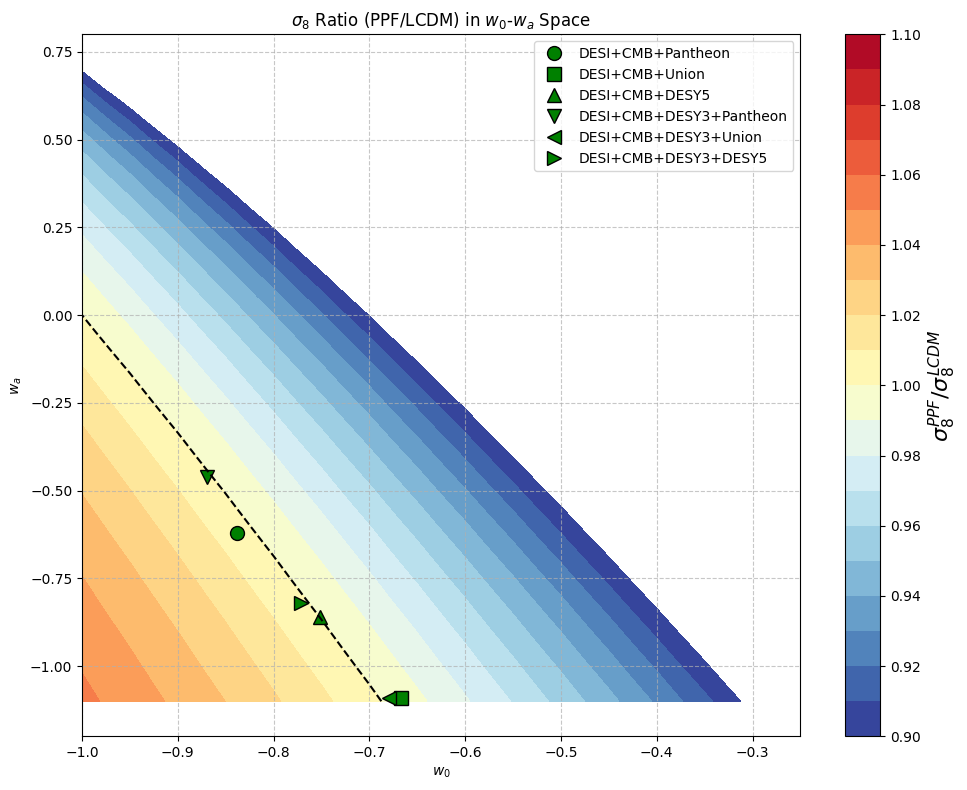

In [24]:
# Create the contour plot
plt.figure(figsize=(10, 8))

vmin = 0.9
vmax = 1.1

# Create contour plot
levels = np.linspace(vmin, vmax, 21)  # Adjust range as needed
contour = plt.contourf(w0_grid, wa_grid, sigma8_ratios, levels=levels, cmap='RdYlBu_r')

# Add colorbar
cbar = plt.colorbar(contour)
cbar.set_label('$\sigma_8^{PPF}/\sigma_8^{LCDM}$', rotation=90, fontsize=16)

# Create 11 ticks including 0.9, 1.0, and 1.1
ticks = np.linspace(vmin, vmax, 11)  # This will include 0.9, 0.92, 0.94, ..., 1.0, ..., 1.08, 1.1
cbar.set_ticks(ticks)
cbar.set_ticklabels([f'{tick:.2f}' for tick in ticks])

# Mark your specific point from the original code
markers = ['o', 's', '^', 'v', '<', '>', 'D', 'p', 'h', '*']
w0_desi = [-0.838,-0.667,-0.752, -0.870, -0.68,-0.771]
wa_desi = [-0.62, -1.09, -0.86, -0.46, -1.09, -0.82]
dataset=['DESI+CMB+Pantheon', 'DESI+CMB+Union',
         'DESI+CMB+DESY5', 
         'DESI+CMB+DESY3+Pantheon', 'DESI+CMB+DESY3+Union', 
         'DESI+CMB+DESY3+DESY5']
for ii in range(len(w0_desi)):
    PPF_desi = setup_cosmo(w0_desi[ii], wa_desi[ii])
    sigma8_PPF_desi = compute_sigma8(PPF_desi)
    # Print the ratio at your specific point
    specific_point_ratio = sigma8_PPF_desi / sigma8_LCDM
    print(f"Ratio at w0={w0_desi[ii]}, wa={wa_desi[ii]}: {specific_point_ratio:.3f}")
    plt.plot(w0_desi[ii], wa_desi[ii], markers[ii], 
             #fillstyle='red', 
             mec='k', mfc='green',
             color='k', markersize=10, label=dataset[ii])

# Add contour line for ratio = 1
plt.contour(w0_grid, wa_grid, sigma8_ratios, levels=[1.0], colors='k', linestyles='dashed')

# Customize plot
plt.xlabel('$w_0$')
plt.ylabel('$w_a$')
plt.ylim(-1.2, 0.8)
plt.title('$\sigma_8$ Ratio (PPF/LCDM) in $w_0$-$w_a$ Space')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

Ratio at w0=-0.838, wa=-0.62: 1.000
Ratio at w0=-0.667, wa=-1.09: 0.996
Ratio at w0=-0.752, wa=-0.86: 0.998
Ratio at w0=-0.87, wa=-0.46: 0.999
Ratio at w0=-0.68, wa=-1.09: 0.997
Ratio at w0=-0.771, wa=-0.82: 0.999


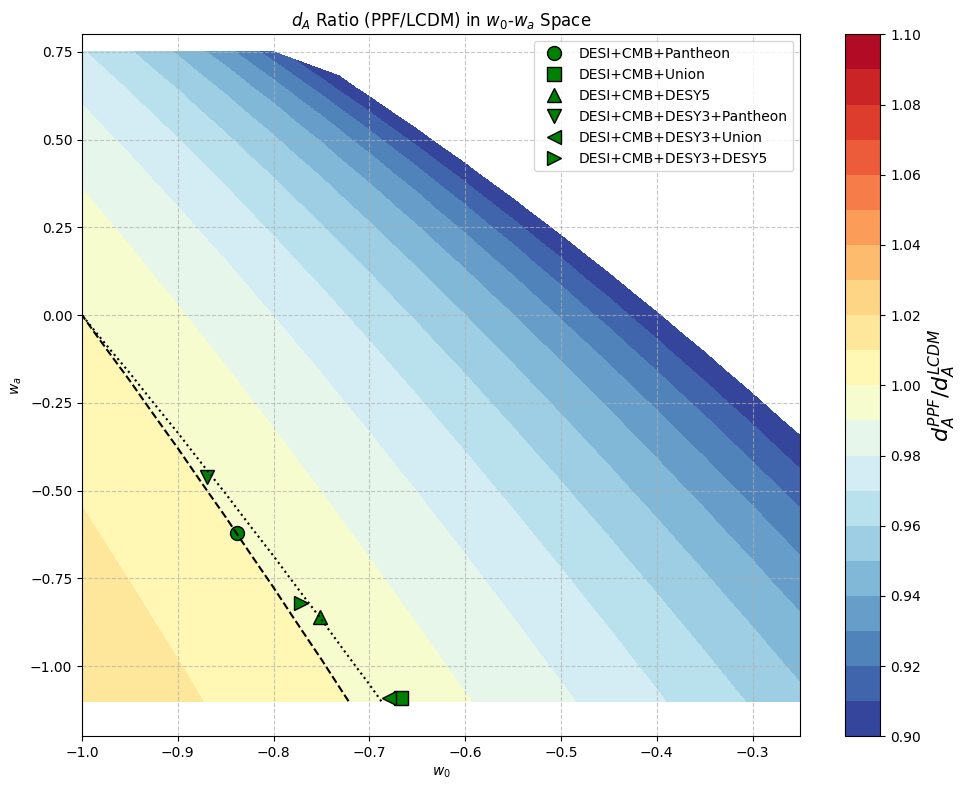

In [22]:
# Create the contour plot
plt.figure(figsize=(10, 8))

vmin = 0.9
vmax = 1.1

# Create contour plot
levels = np.linspace(vmin, vmax, 21)  # Adjust range as needed
contour = plt.contourf(w0_grid, wa_grid, dA_ratios, levels=levels, cmap='RdYlBu_r')

# Add colorbar
cbar = plt.colorbar(contour)
cbar.set_label('$d_A^{PPF}/d_A^{LCDM}$', rotation=90, fontsize=16)

# Create 11 ticks including 0.9, 1.0, and 1.1
ticks = np.linspace(vmin, vmax, 11)  # This will include 0.9, 0.92, 0.94, ..., 1.0, ..., 1.08, 1.1
cbar.set_ticks(ticks)
cbar.set_ticklabels([f'{tick:.2f}' for tick in ticks])

# Mark your specific point from the original code
markers = ['o', 's', '^', 'v', '<', '>', 'D', 'p', 'h', '*']
w0_desi = [-0.838,-0.667,-0.752, -0.870, -0.68,-0.771]
wa_desi = [-0.62, -1.09, -0.86, -0.46, -1.09, -0.82]
dataset=['DESI+CMB+Pantheon', 'DESI+CMB+Union',
         'DESI+CMB+DESY5', 
         'DESI+CMB+DESY3+Pantheon', 'DESI+CMB+DESY3+Union', 
         'DESI+CMB+DESY3+DESY5']
for ii in range(len(w0_desi)):
    PPF_desi = setup_cosmo(w0_desi[ii], wa_desi[ii])
    dA_PPF_desi = PPF_desi.angular_distance(1089)
    # Print the ratio at your specific point
    specific_point_ratio = dA_PPF_desi / dA_LCDM
    print(f"Ratio at w0={w0_desi[ii]}, wa={wa_desi[ii]}: {specific_point_ratio:.3f}")
    plt.plot(w0_desi[ii], wa_desi[ii], markers[ii], 
             #fillstyle='red', 
             mec='k', mfc='green',
             color='k', markersize=10, label=dataset[ii])

# Add contour line for ratio = 1
plt.contour(w0_grid, wa_grid, dA_ratios, levels=[1.0], colors='k', linestyles='dashed')
plt.contour(w0_grid, wa_grid, sigma8_ratios, levels=[1.0], colors='k', linestyles='dotted')

# Customize plot
plt.xlabel('$w_0$')
plt.ylabel('$w_a$')
plt.ylim(-1.2, 0.8)
plt.title('$d_A$ Ratio (PPF/LCDM) in $w_0$-$w_a$ Space')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class


In [8]:
M = Class()
M.set({
    'omega_b': 0.022,       # Baryon density
    'omega_cdm': 0.12,      # Cold dark matter density
    'h': 0.678,             # Hubble parameter
    'A_s': 2.1e-9,          # Amplitude of scalar perturbations
    'n_s': 0.966,           # Scalar spectral index
    'tau_reio': 0.054,      # Reionization optical depth
    'w0_fld': -0.7,         # Equation of state parameter w0
    'wa_fld': 0.0,          # Equation of state parameter wa
    'output': 'tCl,pCl,lCl,mPk',  # Output options
    'lensing': 'yes',       # Include lensing
    'use_ppf': 'yes',
    'Omega_Lambda': 0., 
})
M.compute()

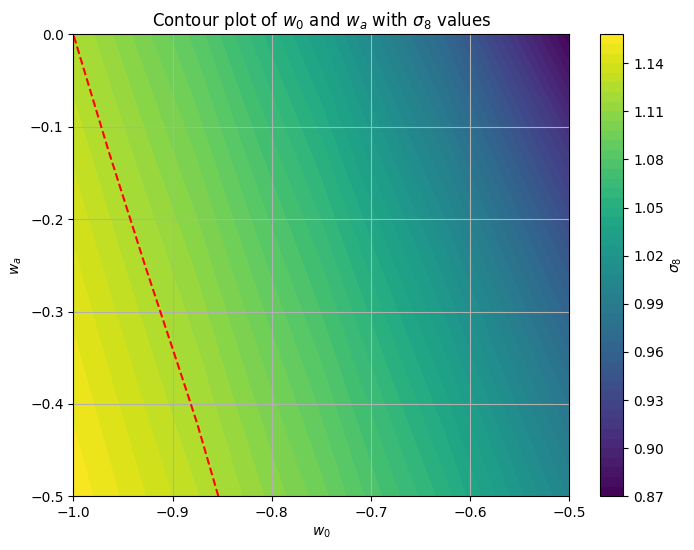

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class

# Define Planck parameters for LCDM
params_LCDM = {
    'output': 'mPk',
    'omega_b': 0.022,
    'omega_cdm': 0.120,
    'h': 0.674,
    'Omega_k': 0.0,
    'YHe': 0.24,  # Set a fixed value for the primordial helium fraction
    'N_ur': 0,    # Number of massless neutrino species
    'N_ncdm': 0,  # Number of non-cold dark matter species
}

# Create a CLASS instance for LCDM to get the reference sigma8
lcdm = Class()
lcdm.set(params_LCDM)
lcdm.compute()
sigma8_LCDM = lcdm.sigma8()
lcdm.struct_cleanup()
lcdm.empty()

# Create a grid of w0 and wa values
w0_values = np.linspace(-1, -0.5, 5)  # Adjust w0 to be less than -0.5
wa_values = np.linspace(-0.5, 0, 5)   # Adjust wa to a reasonable range
sigma8_values = np.zeros((len(w0_values), len(wa_values)))

# Compute sigma8 for each (w0, wa) combination
for i, w0 in enumerate(w0_values):
    for j, wa in enumerate(wa_values):
        params = {
            'output': 'mPk',
            'omega_b': 0.022,
            'omega_cdm': 0.120,
            'h': 0.674,
            'YHe': 0.24,  # Same fixed value for helium fraction
            'w0_fld': w0,
            'wa_fld': wa,
            'Omega_Lambda': 0.0,  # No cosmological constant
            'N_ur': 0.0,  # Neutrinos
            'N_ncdm': 0,  # No non-cold dark matter
            'k_output_values': '0.01'  # Output for k=0.01 h/Mpc
        }

        # Create a CLASS instance for the current w0, wa
        cosmo = Class()
        cosmo.set(params)
        cosmo.compute()

        # Store the computed sigma8
        sigma8_values[i, j] = cosmo.sigma8()

        # Clean up
        cosmo.struct_cleanup()
        cosmo.empty()

# Create a contour plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(w0_values, wa_values, sigma8_values.T, levels=50, cmap='viridis')
plt.colorbar(contour, label=r'$\sigma_8$')
plt.contour(w0_values, wa_values, sigma8_values.T, levels=[sigma8_LCDM], colors='red', linestyles='dashed')
plt.title('Contour plot of $w_0$ and $w_a$ with $\sigma_8$ values')
plt.xlabel(r'$w_0$')
plt.ylabel(r'$w_a$')
plt.axhline(0, color='gray', lw=0.5, ls='--')
plt.axvline(0, color='gray', lw=0.5, ls='--')
plt.xlim(-1, -0.5)
plt.ylim(-0.5, 0)
plt.grid()
plt.show()

In [16]:
import numpy as np
from classy import Class

# Initialize the CLASS instance for ΛCDM
LCDM = Class()
LCDM.set({
    'Omega_cdm': 0.25,
    'Omega_b': 0.05,
    'h': 0.7,  # Reduced Hubble parameter (H_0 = h * 100 km/s/Mpc)
})
LCDM.compute()

# Get the Hubble parameter today
H0 = LCDM.Hubble(0)  # Hubble parameter at redshift z=0
print(f"Hubble parameter today (H0) = {H0:.9f} km/s/Mpc")

Hubble parameter today (H0) = 0.000233495 km/s/Mpc
